In [1]:
import numpy as np
import time
import mpnet_training
import generate_steering
from typing import Optional, Tuple
import utils_function
import tensorflow as tf
import torch
import utils_function
from pathlib import Path
import plot_fig
import matplotlib.pyplot as plt

Using device: cuda


In [2]:
start_time = time.time()

###### model hyperparams######
optimizer='Adam'
lr = 1e-3
lr_constrained=1e-4
momentum = 0.9
epochs = 1
batch_size = 300
k = 8
batch_subsampling = 10

train_type = 'online'

#scene generation params
f0=28e9 #HZ


In [3]:
#get real and nominal antenna pos
path_init=Path.cwd()
file_name = 'Data2/datasionna/antenna_position.npz'  
antenna_pos = np.load(path_init/file_name)
nominal_ant_positions=antenna_pos['nominal_position']
real_ant_positions=antenna_pos['real_position']

In [4]:
######Dictionnary parameters######
DoA =np.zeros((1200,3))
DoA[:,1]= np.random.uniform(-np.pi,np.pi,1200) #random Azimuth angles uniformly distributed between 0 and 2*pi
g_vec= np.ones(64)
lambda_ = 0.010706874

In [ ]:
model = mpnet_training.UnfoldingModel_Sim(
                 nominal_ant_positions,
                 real_ant_positions,
                 DoA,
                 g_vec,
                 lambda_,              
                 lr,
                 lr_constrained,
                 momentum,                 
                 optimizer,
                 epochs, batch_size,
                 k, 
                 batch_subsampling,
                 train_type,
                 f0,
)



In [ ]:
model.train_online_test_inference()

In [ ]:
plot_fig.plot_NMSE_Online(model,200)

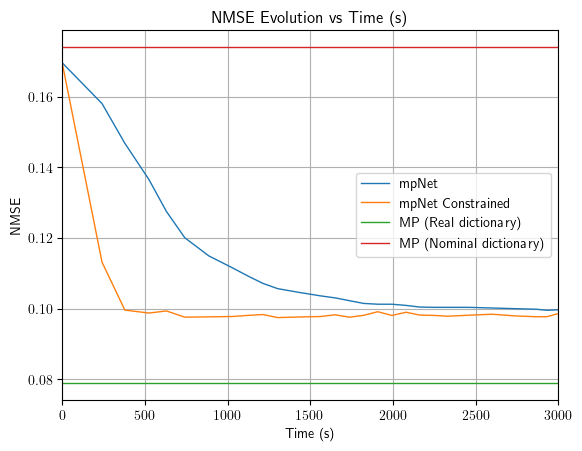

In [25]:

plt.rcParams['text.usetex'] = True
plt.figure()

plt.plot(model.times, model.NMSE_mpnet, '-', linewidth=1, label='mpNet')  
plt.plot(model.times, model.NMSE_c_mpnet, '-', linewidth=1, label='mpNet Constrained')
plt.plot(model.times, model.NMSE_mp_real, '-', linewidth=1, label='MP (Real dictionary)') 
plt.plot(model.times, model.NMSE_mp_nominal, '-', linewidth=1, label='MP (Nominal dictionary)')  

plt.grid()
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('NMSE')
plt.title('NMSE Evolution vs Time (s)')
plt.xlim(left=0)
plt.xlim(right=3000)

plt.show()
